<a href="https://colab.research.google.com/github/renaud-florquin/hands_on_AI/blob/master/Intro2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!nvidia-smi

Fri Oct  4 14:13:10 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    61W / 149W |    150MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils

In [0]:
plt.close()

In [49]:
plt.figure(figsize=(12, 10))

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

Load the data and check the size of the train and test dataset

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() 

In [18]:
print('x Train: ', x_train.shape)
print('y Train: ', y_train.shape)
print('x Test: ', x_test.shape)
print('y Test: ', y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Display the first images and the corresponding label

TypeError: ignored

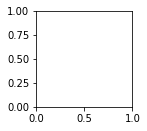

In [50]:
amount = 20
img_rows = 3
img_columns = 4
amount = img_rows * img_columns
fig = plt.figure()

for i in range(amount):
    ax = fig.add_subplot(img_rows, img_columns, 1 + i)
    plt.imshow(x_train[i], cmap='binary')
    plt.title(y_train[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.sca(ax)

plt.show()

In [0]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

In [0]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [0]:
nb_classes=10
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [24]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [25]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [26]:
# solution 1
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(784,)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(nb_classes))
model.add(tf.keras.layers.Activation('softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [32]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0672 - acc: 0.9811 - val_loss: 0.1050 - val_acc: 0.9690
Epoch 2/50
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0664 - acc: 0.9810 - val_loss: 0.1048 - val_acc: 0.9688
Epoch 3/50
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0657 - acc: 0.9818 - val_loss: 0.1053 - val_acc: 0.9687
Epoch 4/50
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0651 - acc: 0.9819 - val_loss: 0.1054 - val_acc: 0.9683
Epoch 5/50
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0644 - acc: 0.9823 - val_loss: 0.1058 - val_acc: 0.9683
Epoch 6/50
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0637 - acc: 0.9823 - val_loss: 0.1044 - val_acc: 0.9691
Epoch 7/50
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0631 - acc: 0.9823 - val_loss

Plot the training and validation accuracy per epoch

<Figure size 432x288 with 0 Axes>

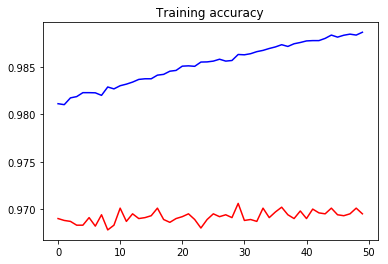

<Figure size 432x288 with 0 Axes>

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs   = range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'b')
plt.plot(epochs, val_acc, 'r')
plt.title('Training accuracy')
plt.figure()
